In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
# from registration_utilities import Aligner3, parallel_where
from registration_utilities import *
from metadata import *

import matplotlib.pyplot as plt
%matplotlib inline

from joblib import Parallel, delayed
import time

Setting environment for Gordon


In [13]:
volume1 = bp.unpack_ndarray_file(os.path.join(volume_dir, 'MD589/MD589_annotationVolume.bp'))[::2, ::2, ::2]
volume2 = bp.unpack_ndarray_file(os.path.join(volume_dir, 'MD585/MD585_annotationVolume.bp'))[::2, ::2, ::2]

In [14]:
vol1_ydim, vol1_xdim, vol1_zdim = volume1.shape
print vol1_xdim, vol1_ydim, vol1_zdim

405 203 267


In [15]:
vol2_ydim, vol2_xdim, vol2_zdim = volume2.shape
print vol2_xdim, vol2_ydim, vol2_zdim

410 240 218


In [16]:
aligner = Aligner3(volume1, volume2, labelIndexMap_m2f={i:i for i in set(np.unique(volume2)) - {0}})

In [17]:
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')

In [18]:
aligner.load_gradient()

load gradient 1: 1.595867 seconds
load gradient 2: 1.858652 seconds
load gradient 3: 0.992560 seconds
load gradient 4: 1.018786 seconds
load gradient 5: 1.548241 seconds
load gradient 6: 4.252622 seconds
load gradient 7: 4.256178 seconds
load gradient 8: 7.867036 seconds
load gradient 9: 10.745667 seconds
load gradient 10: 9.930897 seconds
load gradient 11: 12.142601 seconds
load gradient 12: 7.433263 seconds
load gradient 13: 7.692595 seconds
load gradient 14: 8.699744 seconds
load gradient 15: 8.802439 seconds
load gradient 16: 9.810446 seconds
load gradient 17: 7.266687 seconds
load gradient 18: 8.867838 seconds
load gradient 19: 8.855254 seconds
load gradient 20: 7.753762 seconds
load gradient 21: 7.566433 seconds
load gradient 22: 8.743627 seconds
load gradient 23: 7.808135 seconds
load gradient 24: 7.014604 seconds
load gradient 25: 8.729215 seconds
load gradient 26: 7.689930 seconds
overall: 178.954771 seconds


In [8]:
T, scores = aligner.optimize(type='rigid', grid_search_iteration_number=3, grid_search_sample_number=5000,
                             max_iter_num=5000, history_len=200, terminate_thresh=1e-3)

grid search: 2.600455 seconds
grid search: 1.955210 seconds
grid search: 1.568913 seconds


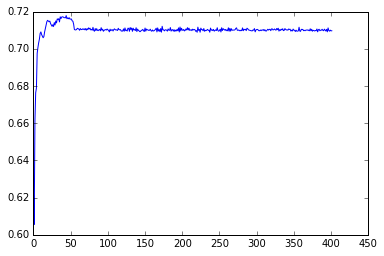

In [11]:
plt.plot(scores);